In [0]:
import numpy as np
import pandas as pd

In [0]:
data=pd.read_csv('/content/insurance_claims.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000.0,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300.0,0.0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5.0,1,YES,1,2,YES,71610.0,6510.0,13020.0,52080.0,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000.0,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0.0,0.0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8.0,1,?,0,0,?,5070.0,780.0,780.0,3510.0,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000.0,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100.0,0.0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7.0,3,NO,2,3,NO,34650.0,7700.0,3850.0,23100.0,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000.0,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900.0,-62400.0,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5.0,1,?,1,2,NO,63400.0,6340.0,6340.0,50720.0,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000.0,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000.0,-46000.0,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20.0,1,NO,0,1,NO,6500.0,1300.0,650.0,4550.0,Accura,RSX,2009,N


In [0]:
data.shape

(948, 39)

In [0]:
data.describe()

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,capital_gains,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,Insured_Male,Insured_Female,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available,Police Report unsure
count,948.000000,948.000000,948.000000,948.000000,9.480000e+02,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,204.850211,39.007384,544336.090717,1256.889177,1.094937e+06,24843.630573,1.850211,0.994726,1.477848,52698.012821,2005.078059,0.251055,0.535865,0.464135,0.277426,0.353376,0.277426,0.091772,0.340717,0.348101,0.311181
std,115.438189,9.167971,257464.186495,244.109773,2.300878e+06,27791.662633,1.022828,0.817557,1.113674,26155.272116,5.979570,0.433849,0.498975,0.498975,0.447965,0.478270,0.447965,0.288856,0.474201,0.476620,0.463221
min,0.000000,19.000000,100804.000000,433.330000,-1.000000e+06,0.000000,1.000000,0.000000,0.000000,100.000000,1995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.000000,32.000000,332885.750000,1090.567500,0.000000e+00,0.000000,1.000000,0.000000,0.000000,42180.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,200.000000,38.000000,528102.000000,1257.200000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,57880.000000,2005.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,279.000000,45.000000,757073.750000,1415.695000,0.000000e+00,50425.000000,3.000000,2.000000,2.000000,70425.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,479.000000,64.000000,999435.000000,2047.590000,1.000000e+07,100500.000000,4.000000,2.000000,3.000000,114920.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Data Preprocessing**

In [0]:
  data.drop(columns = ['policy_bind_date','policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim'], axis = 1, inplace = True)

In [0]:
data.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_state                    1
policy_deductable               1
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
capital_gains                   6
capital_loss                    1
collision_type                  1
incident_severity               0
incident_location               4
incident_hour_of_the_day        2
number_of_vehicles_involved     0
bodily_injuries                 0
witnesses                       0
police_report_available         2
total_claim_amount             12
auto_make                       0
auto_model                      0
auto_year                       0
fraud_reported                  0
dtype: int64

In [0]:
data['collision_type'].fillna(data['collision_type'].value_counts().index[0], inplace = True)
data['total_claim_amount'].fillna(data['total_claim_amount'].mean(), inplace = True)
data['police_report_available'].fillna(data['police_report_available'].value_counts().index[0], inplace = True)

In [0]:
data.drop(columns = ['incident_location', 'incident_hour_of_the_day','policy_state', 'policy_deductable','capital_loss'], axis = 1, inplace = True)

In [0]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
capital_gains                  6
collision_type                 0
incident_severity              0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
auto_make                      0
auto_model                     0
auto_year                      0
fraud_reported                 0
dtype: int64

In [0]:
data['capital_gains'].fillna(data['capital_gains'].mean(), inplace = True)

In [0]:
data.head()

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,insured_sex,capital_gains,incident_severity,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,1406.91,0,MALE,53300.0,Major Damage,1,1,2,YES,71610.0,Saab,92x,2004,Y
1,228,42,342868,1197.22,5000000,MALE,0.0,Minor Damage,1,0,0,?,5070.0,Mercedes,E400,2007,Y
2,134,29,687698,1413.14,5000000,FEMALE,35100.0,Minor Damage,3,2,3,NO,34650.0,Dodge,RAM,2007,N
3,256,41,227811,1415.74,6000000,FEMALE,48900.0,Major Damage,1,1,2,NO,63400.0,Chevrolet,Tahoe,2014,Y
4,228,44,367455,1583.91,6000000,MALE,66000.0,Minor Damage,1,0,1,NO,6500.0,Accura,RSX,2009,N


In [0]:
data.head()

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,insured_sex,capital_gains,incident_severity,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_year,fraud_reported
0,328,48,521585,1406.91,0,MALE,53300.0,Major Damage,1,1,2,YES,71610.0,2004,Y
1,228,42,342868,1197.22,5000000,MALE,0.0,Minor Damage,1,0,0,?,5070.0,2007,Y
2,134,29,687698,1413.14,5000000,FEMALE,35100.0,Minor Damage,3,2,3,NO,34650.0,2007,N
3,256,41,227811,1415.74,6000000,FEMALE,48900.0,Major Damage,1,1,2,NO,63400.0,2014,Y
4,228,44,367455,1583.91,6000000,MALE,66000.0,Minor Damage,1,0,1,NO,6500.0,2009,N


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

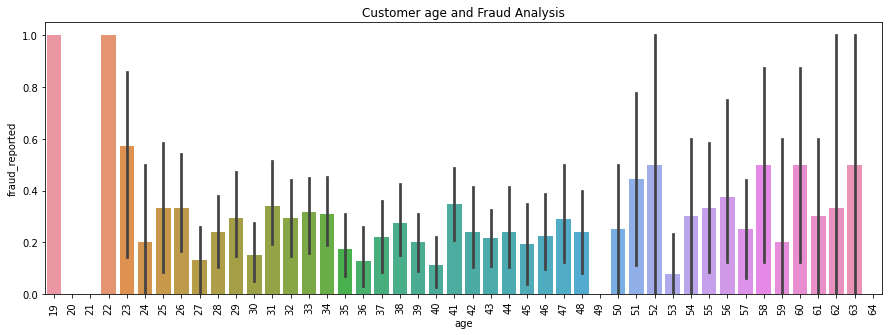

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(x=data['age'],y=data['fraud_reported'])
plt.title("Customer age and Fraud Analysis")
plt.xticks(rotation=90)

## **OneHotEncoding**

In [0]:
data_onehot = data[['insured_sex', 'incident_severity', 'police_report_available']]

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
enc = OneHotEncoder(sparse = False)

In [0]:
enc.fit(data_onehot)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [0]:
data_onehot_transformed = enc.transform(data_onehot)
data_onehot_transformed

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [0]:
data_onehot_transformed.shape

(948, 9)

In [0]:
data2 = pd.DataFrame(data_onehot_transformed, columns = ['Insured_Male', 'Insured_Female','Major Damage','Minor Damage','Total Loss','Trivial Damage', 'Police Report available', 'Police report not available','Police Report unsure'])

In [0]:
data2.head()

,Insured_Male,Insured_Female,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available,Police Report unsure
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [0]:
data = pd.concat([data, data2], axis = 1)

In [0]:
data['fraud_reported'] = data['fraud_reported'].replace({'Y': 1, 'N': 0})

In [0]:
data.drop(['insured_sex', 'incident_severity','police_report_available'], axis = 1, inplace = True)

In [0]:
X = data.drop('fraud_reported', axis= 1)
X.head()

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,capital_gains,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,Insured_Male,Insured_Female,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available,Police Report unsure
0,328,48,521585,1406.91,0,53300.0,1,1,2,71610.0,2004,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,228,42,342868,1197.22,5000000,0.0,1,0,0,5070.0,2007,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,134,29,687698,1413.14,5000000,35100.0,3,2,3,34650.0,2007,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,256,41,227811,1415.74,6000000,48900.0,1,1,2,63400.0,2014,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,228,44,367455,1583.91,6000000,66000.0,1,0,1,6500.0,2009,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [0]:
y = data['fraud_reported']

## **Prediction with different Classifiers**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
clf=LogisticRegression()

In [0]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.score(X_train,y_train)

0.7426160337552743

In [0]:
clf.score(X_test,y_test)

0.7721518987341772

In [0]:
clf=LogisticRegression(C=1,solver='sag')
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.score(X_test,y_test)

0.7510548523206751

## **Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=10)

In [0]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
clf.score(X_train,y_train)

0.9676511954992968

In [0]:
clf.score(X_test,y_test)

0.7383966244725738

## **Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=10,n_estimators=500)

In [0]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
clf.score(X_train,y_train)


0.9817158931082982

In [0]:
clf.score(X_test,y_test)

0.8143459915611815

## **KNN**

In [0]:
from sklearn.model_selection import cross_val_score
x_axis=[]
y_axis=[]
for i in range(1,26,2):
    x_axis.append(i)
    clf=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf,X_train,y_train)
    y_axis.append(score.mean())

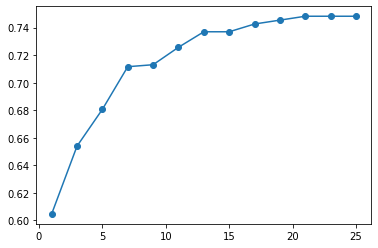

In [0]:
import matplotlib.pyplot as plt
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y_axis)
plt.show()

In [0]:
#We saw that k=21 gives highest avg score
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=21)

In [0]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [0]:
clf.score(X_train,y_train)

0.7482419127988749

In [0]:
clf.score(X_test,y_test)

0.7468354430379747

## **Naive Bayes**

In [0]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
clf=GaussianNB()

In [0]:
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
clf.score(X_train,y_train)

0.739803094233474

In [0]:
clf.score(X_test,y_test)

0.7172995780590717

## **SVM**

In [0]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')

In [0]:
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
clf.score(X_train,y_train)

0.7482419127988749

In [0]:
clf.score(X_test,y_test)

0.7510548523206751

## **MLP Classifier**

In [0]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier()

In [0]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
clf.score(X_train,y_train)

0.679324894514768

In [0]:
clf.score(X_test,y_test)

0.6413502109704642

# After looking at scores, we will choose random forest as our classifier for test.csv

In [0]:
test_data = pd.read_csv('/content/test.csv')

In [0]:
test_data.drop(columns = ['policy_bind_date','policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim','incident_location', 'incident_hour_of_the_day','policy_state','collision_type', 'policy_deductable','capital_loss','auto_make','auto_model'], axis = 1, inplace = True)

In [0]:
test_data['total_claim_amount'].fillna(test_data['total_claim_amount'].mean(), inplace = True)
test_data['police_report_available'].fillna(test_data['police_report_available'].value_counts().index[0], inplace = True)
test_data['capital_gains'].fillna(test_data['capital_gains'].mean(), inplace = True)

In [0]:
data_onehot = test_data[['insured_sex', 'incident_severity', 'police_report_available']]
enc.fit(data_onehot)
test_data_onehot_transformed = enc.transform(data_onehot)
data2 = pd.DataFrame(test_data_onehot_transformed, columns = ['Insured_Male', 'Insured_Female','Major Damage','Minor Damage','Total Loss','Trivial Damage', 'Police Report available', 'Police report not available','Police Report unsure'])
test_data = pd.concat([test_data, data2], axis = 1)
test_data.drop(['insured_sex', 'incident_severity','police_report_available'], axis = 1, inplace = True)
#test_data['fraud_reported'] = test_data['fraud_reported'].replace({'Y': 1, 'N': 0})
X =test_data.drop('fraud_reported', axis= 1)
X.head()

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,capital_gains,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,Insured_Male,Insured_Female,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available,Police Report unsure
0,126,31,889003,1328.26,0,42300,1,1,1,60840.0,2011,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,407,55,193213,1250.08,5000000,0,3,2,3,68160.0,2010,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,101,27,557218,982.70,6000000,30800,1,1,0,5170.0,2001,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,187,37,125591,1412.06,5000000,60100,1,0,3,57700.0,2000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,252,46,227244,1066.70,0,0,3,0,2,89520.0,2014,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
pred=clf.predict(X)

In [0]:
final_labels=[]

In [0]:
for i in range(len(pred)):
  if pred[i]==0:
    final_labels.append('NO')
  else:
    final_labels.append('YES')
final_labels

In [0]:
results=pd.DataFrame({"Fraud Reported":final_labels})

In [0]:
results.to_csv('Insurance DSC.csv', index=False)